<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>FoodHub Data Analysis</center></h1>
<h4><center>Author: Rahul Ganbote</center></h4>


<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Foodhub_logo.svg/512px-Foodhub_logo.svg.png" width="700" height="50"></center>
<b></b>


<b></b><h2><center>**FoodHub Case Study**</center></h2>
### Context

New York is a very big metro city and day by day, many restaurants are opening in New York. With a fast living style, working professionals as well as students are heavily relying on online food delivery service to provide fresh and favorite food options with short delivery time. Due to such an increase in demand, more online food delivery services are coming into the market. **FoodHub** is a food delivery service provider company. FoodHub provides food options from a variety of cuisines through their single smartphone App. Customers can place a food order through the FoodhHub App and have it delivered to their location.

The customer selects a restaurant and submits the food order in the FoodHub app which is directly sent to the restaurants over the internet. When the restaurant accepts the food order the app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.

### Objective

The FoodHub has stored the data of the different orders made by the registered customers in their online portal. **They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.** Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* Rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries required to read and analyze data

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Following code ignores FutureWarning type of warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)   # Not the best practices but added to get clean report

### Understanding the structure of the data

In [2]:
# Run the following lines let Google Colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/GreatLearning/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
# Best practice: copy data to another variable to avoid any changes to original data
data = df.copy()

In [5]:
# Sorting by order_id in ascending order
#data.sort_values(by='order_id', inplace=True)
# Reindexing after sorting
#data.reset_index(drop=True, inplace=True)
#data.head()

### Observations:
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the food order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Get the size of data in (rows,columns)
data.shape

(1898, 9)

### Observations:
Foodhub order data has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
#  info() function prints a concise summary of the DataFrame including data types of column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Observations:
4 objects, 4 integers and a float type of data exists in this dataset

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Get the unique values in rating columns
data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [9]:
# We can consider "Not given" as missing data but "Not given" means customer may have chosen intentionally not to give rating or forgot to give rating etc. Customer may not have given feedback due to variety of reason.

# In case if we consider to replace "Not given" rating as 0 so all data is in numeric type if the data is huge data but this is not a big data.
#data['rating'].replace(['Not given'], 0, inplace=True)
# changing the data type to integer
#data['rating'] = data['rating'].astype(int)

# Let's decide not to treat rating data and accept "Not given" as valid data and proceed for further analysis

In [10]:
# Get unique values in the 'rating' column
data['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [11]:
# Let's check if any duplicate orders in data
data.duplicated().sum()

0

In [12]:
# Get the unique values in restaurant name columns
#data['restaurant_name'].sort_values().unique()

In [13]:
# Get the unique names in restaurant name columns
data['restaurant_name'].nunique()

178

**Let's check the count and percentage of categorical levels in each column**

In [14]:
# Making a list of all categorical variables
cat_cols =  ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
--------------------------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
--------------------------------------------------
Not given    736
5        

### Observations:


1. There is no missing data. All the rows has non-null values.
2. There are no duplicates this dataset
3. Rating is object data type because some orders have "Not given" as rating.  "Not given" means customer may have chosen intentionally not to give rating or forgot to give rating. Customer may not have given rating due to variety of reason. It needs further analysis. No need to treate this data.

4. FoodHub delivered from 14 different cuisine types.
5. A lot of customer didnt provide rating but whoever provided rating, they gave 3 or higher rating.





### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [15]:
# Get stats
data.describe().T
# data.describe(include='all').T  # To get all columns

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


### Observations:

1. cost_of_the_order: (Assume cost of order is dollars) Average cost of order through FoodHub was 16.50 dollars.
2. Cost of 50% of orders was under 14.14 dollars.

3. Some food orders were expense up to 35.41 dollars. Cost of order data is right skewed distribution.
4. More than 50% of customers gave 4 or higher rating.
5. food_preparation_time: Average time for food preparation is approx. 27 mins.Some food order took only 20mins whereas some food order took almost 35mins for preparation.
4. delivery_time: 24 mins is average time to deliver the food after delivery person pickup the food from restaurant. Minimum is 15mins only whereas some food order took almost 33mins to deliver the order to customer. 75% of order took less than half hour to deliver the order.


### **Question 5:** How many orders are not rated? [1 mark]

In [16]:
# Write the code here
data['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [17]:
# Compare the Rating count and what their percentage
pd.DataFrame({'Rating Count': data['rating'].value_counts(),'Percentage':data['rating'].value_counts(normalize=True) * 100})

,Rating Count,Percentage
Not given,736,38.777661
5,588,30.979979
4,386,20.337197
3,188,9.905163


### Observations:
1. 736 orders are not rated. 39% orders are not rated.
2. Rest all orders has 3 or higher rating. No 1 or 2 rating which is positive.
3. 50% of orders has 4 or higher rating



---


### **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Let's analyze numerical columns.

####Order ID

In [18]:
# Check if there any duplicate
# check unique order ID
data['order_id'].nunique()

1898

### Observations:
Unique order-ids matches to number of orders in data. No duplicate order-id.

####Customer ID

In [19]:
## check how many different customers
data['customer_id'].nunique()  # check unique customer ID

1200

### Observations:
Total 1200 registered customers in dataset. Some customers ordered more than once via FoodHub app

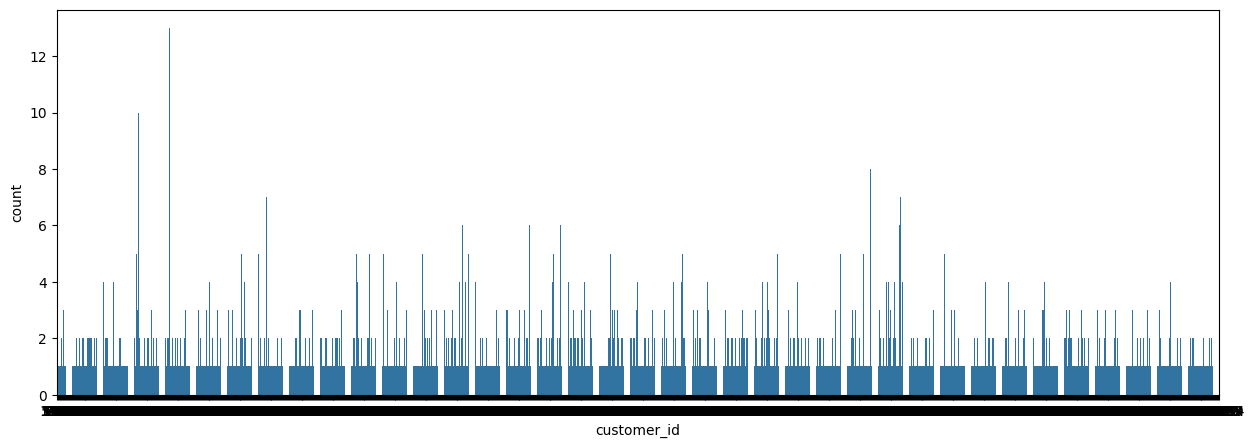

In [20]:
plt.figure(figsize = (15,5))
sns.countplot(data,x = 'customer_id'); ## Create a countplot for customer_id. Indicate how many orders a customer has in this dataset
plt.show()

#### Cost of the order

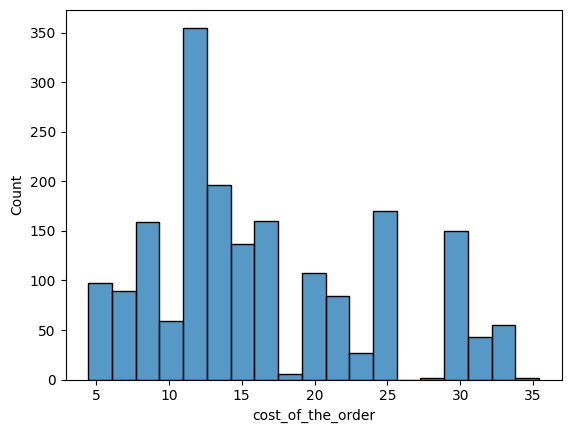

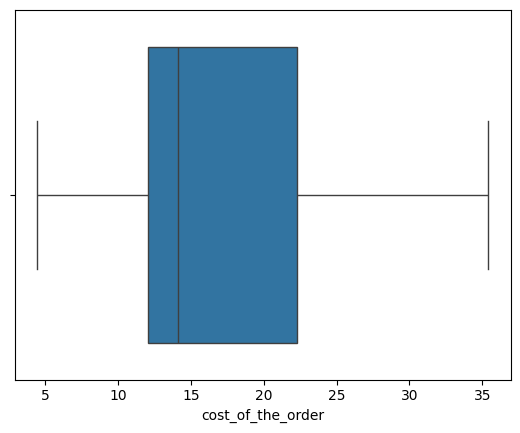

In [21]:
sns.histplot(data,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

### Observations:
1. Cost of order data is right skewed.
2. Median value is approx. 14 dollars. 50% of orders were under 14 dollars.
3. Around 350 orders costed between 11 and 12 dollars.

#### Food Preparation time

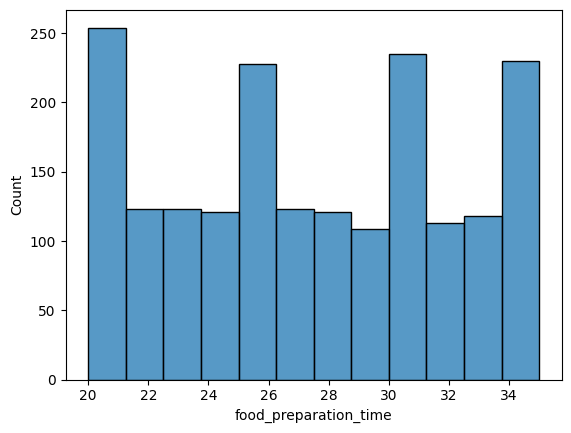

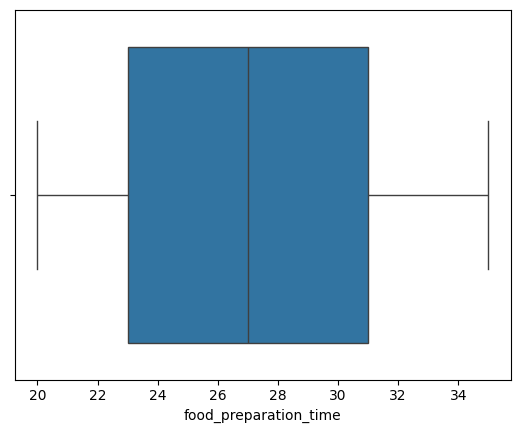

In [22]:
sns.histplot(data,x='food_preparation_time') ## Histogram for the food preparation time
plt.show()
sns.boxplot(data,x='food_preparation_time') ## Boxplot for the food preparation time
plt.show()

### Observations:
1. Normaly distruted data.
2. Minimum time took to prepare a food order is 23mins.
3. 50% of food orders took more than 27 mins.
4. Most (75% of orders) orders took 31mins or less.


#### Delivery time

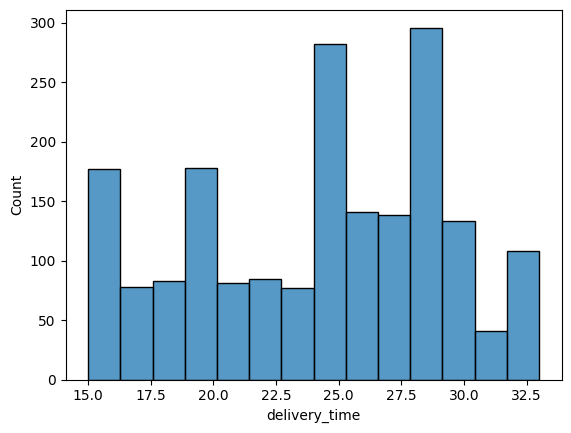

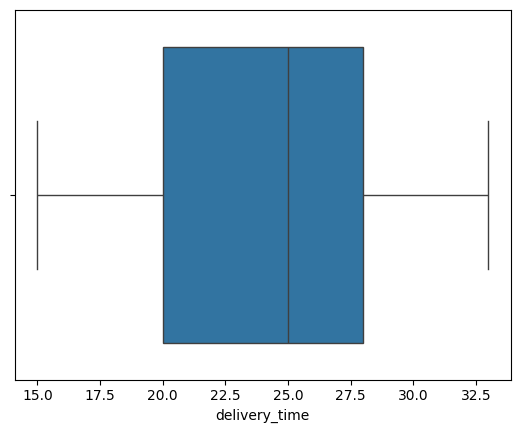

In [23]:
sns.histplot(data,x='delivery_time') ## Histogram for the delivery time
plt.show()
sns.boxplot(data,x='delivery_time') ## Boxplot for the delivery time
plt.show()

### Observations:

1. Left skewed data.
2. Minimum time took to deliver a food order is 20mins.
3. 50% of food orders took more than 25 mins.
4. Most (75% of orders) orders took 28mins or less.


### Now let's analyze categorical columns.

#### Restaurant name

In [24]:
# check unique Restaurant Name
data['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

### Observations:
Total 178 restaurants available on FoodHub app

#### Cuisine type

In [25]:
# Check unique cuisine type
data['cuisine_type'].nunique() ## Gives number of different cuisine type available in FoodHub

14

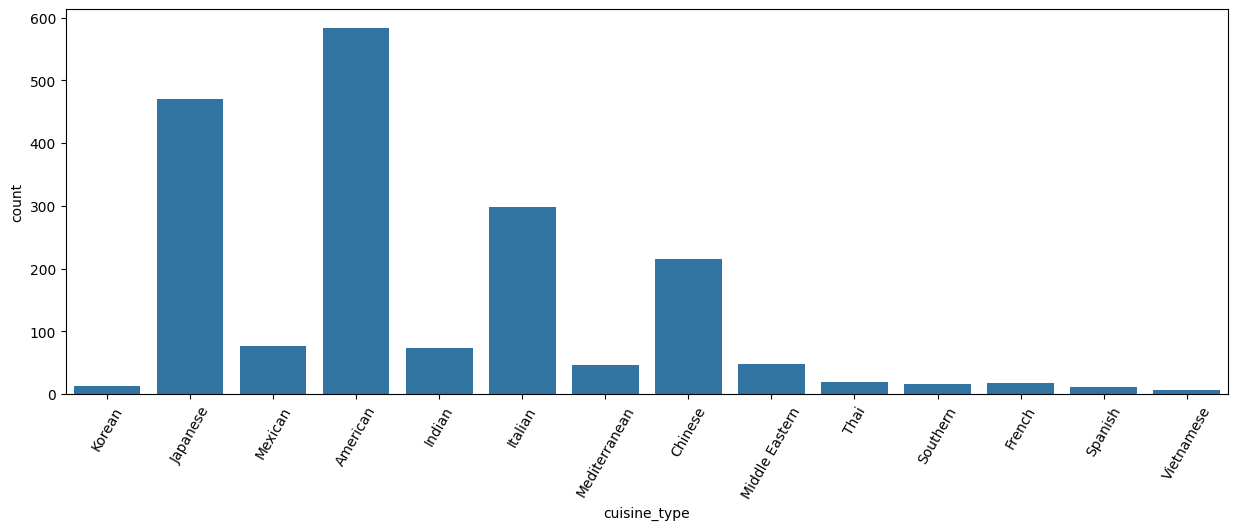

In [26]:
# Number of orders by Cuisine type
plt.figure(figsize = (15,5))
sns.countplot(data, x = 'cuisine_type'); ## Countplot for cuisine type.
plt.xticks(rotation=60);

### Observations:
1. 14 types of cuisine in FoodHub
2. The most famous type cuisine is American.
3. American, Japanese, Italian and Chinese are most popular food on FoodHub

#### Day of the week

In [27]:
# # Check the unique values for the 'day_of_the_week' column again
data['day_of_the_week'].nunique()

2

[Text(0, 0, '1351'), Text(0, 0, '547')]

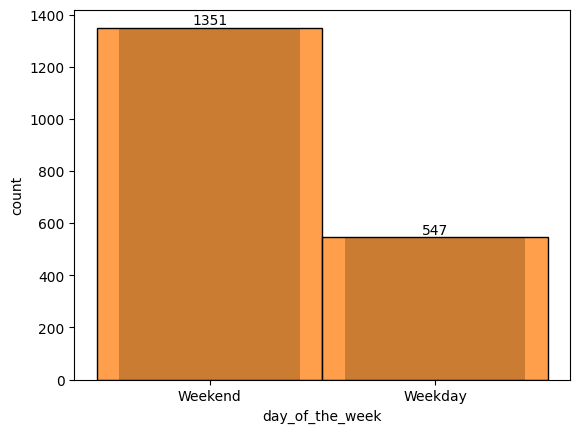

In [28]:
sns.countplot(data, x = 'day_of_the_week'); ## Countplot for 'day_of_the_week' column
ax=sns.histplot(data=df,x='day_of_the_week');
ax.bar_label(ax.containers[0])

### Observations:

1. Number of orders received on the weekend is more than double the orders received on during weekdays.
2. Dont have details about what day during weekday or weekend

#### Rating

In [29]:
# Check the unique values for the 'rating' column again
data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

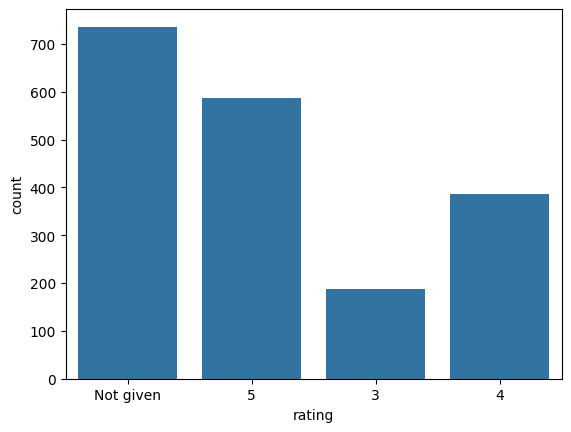

In [30]:
sns.countplot(data, x = 'rating'); ## Countplot will show bar graph for 'rating' column

### Observations:
1. 736 orders are not rated. 39% orders are not rated.
2. Rest all orders has 3 or higher rating. No 1 or 2 rating which is positive.
3. 50% of orders has 4 or higher rating

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [31]:
# Get top 5 restaurants with highest number of orders
data['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
1. Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 restaurants in terms of number of orders received.
2. Shake Shack is the most popular restaurant on FoodHub from this dataset.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [32]:
# Get most popular cuisine on weekends
weekend_data = data[data['day_of_the_week'] == 'Weekend']     ## filter the orders based on orders received on the weekend
weekend_data['cuisine_type'].value_counts() ## Get the count of orders for the cuisine type from this weekend only data

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
The most popular cuisine on weekends is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [33]:
# Get orders that cost above 20 dollars
orders_greater_than_20 = data[data['cost_of_the_order']>20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', orders_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (orders_greater_than_20.shape[0] / data.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
29.24% of orders costed more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [34]:
# Get the mean delivery time
mean_delivery_time = data['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_delivery_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
The mean delivery time for this dataset is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [35]:
# Get the counts of  each customer_id
data['customer_id'].value_counts().head()  ## head() gives top 5 most frequent customers. We can also use head(3) to get explicitly top 3 ids.

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
The top most 3 frequent customer ids are 52832, 47440 and 83287, and they placed 13, 10 and 9 orders, respectively, based on this dataset.

### **Multivariate Analysis**

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine vs Cost of the order

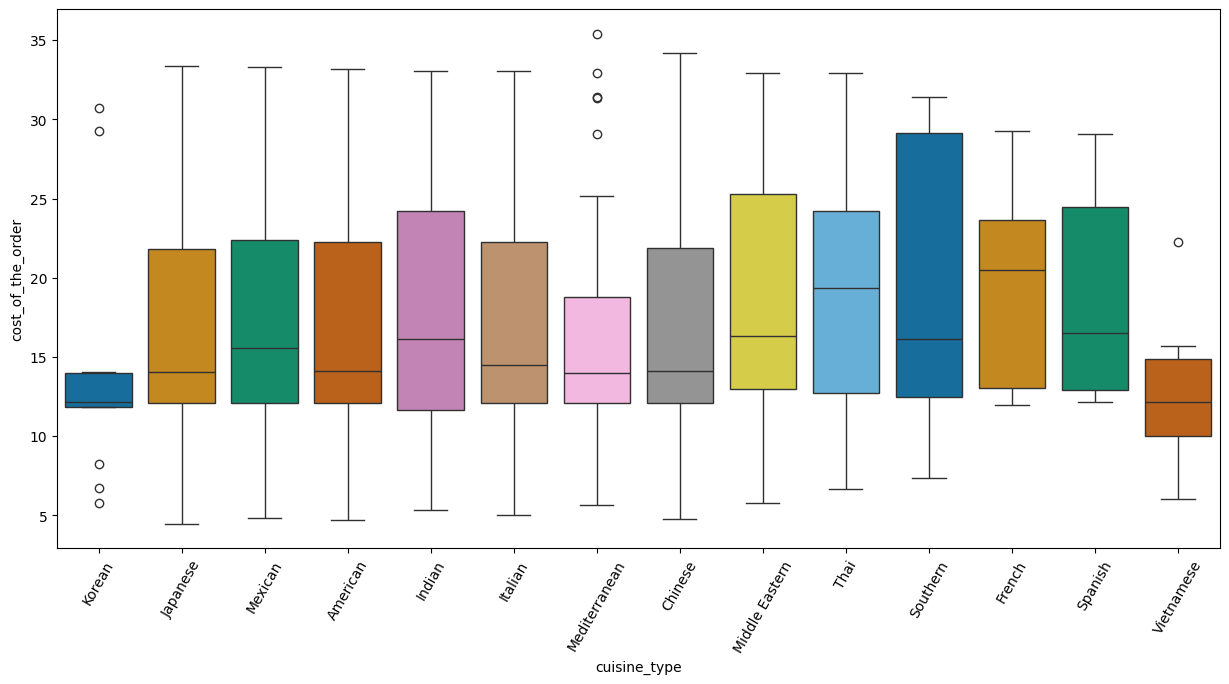

In [36]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = data, palette = 'colorblind');
plt.xticks(rotation = 60)
plt.show()

#### Observations:
1. Median cost of French and Thai food orders is highest among different type of cuisines
2. Median cost of Vietnamese and Korean food orders is lowest among different type of cuisines
3. Broad range of cost for orders placed for Southern type of cuisine, and data is right skewed.
4. Some outliers orders in terms cost for orders from Mediterranean cuisine
5. Most food orders cost was 12 dollars or higher for all cuisine type except Vietnamese food orders.

#### Cuisine vs Food Preparation time

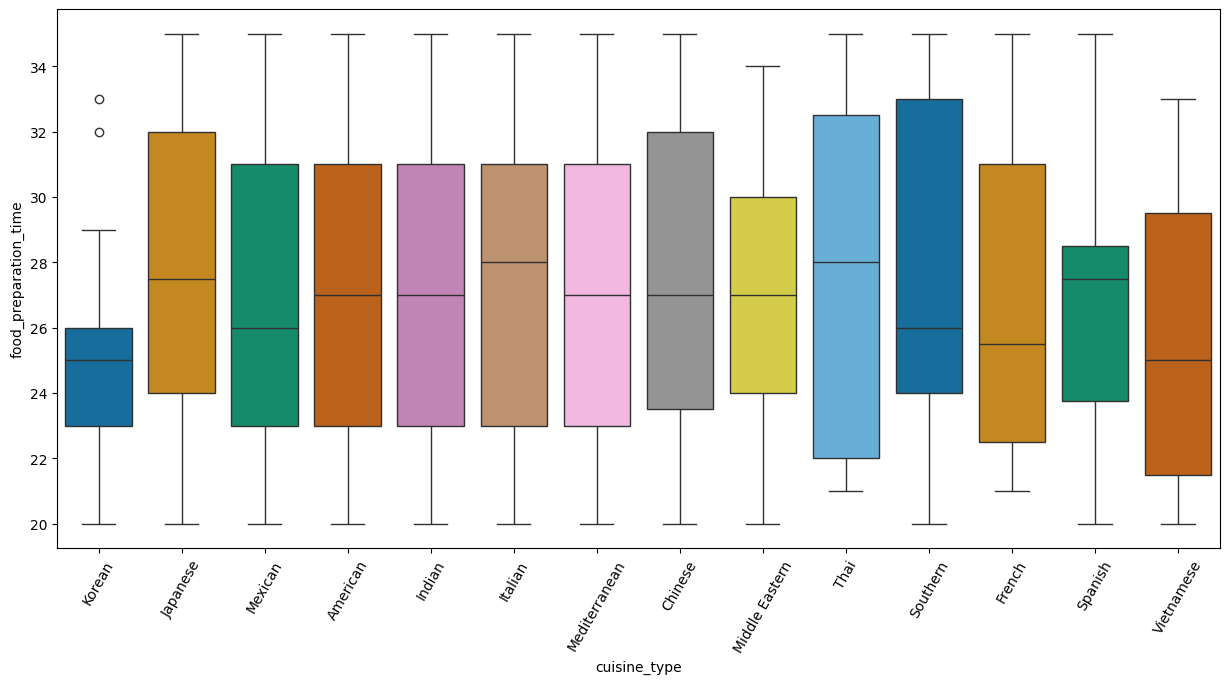

In [37]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = data, palette = 'colorblind')  ## Code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Observations:
1. Median food preparation time for Italian and Thai food orders is highest among different type of cuisines.
2. Median food preparation time for Vietnamese and Korean food orders is lowest among different type of cuisines.
3. Broad range of food preparation time for orders placed for Thai type of cuisine, and data is slight left skewed.
4. Few outliers orders in terms preparation time for orders from Korean cuisine
5. Minimum food orders preparation time was 20 minutes or higher for most of the cuisines.
6. Median preparation time for all cuisines fall between 25 to 28 mins.

#### Day of the Week vs Delivery time

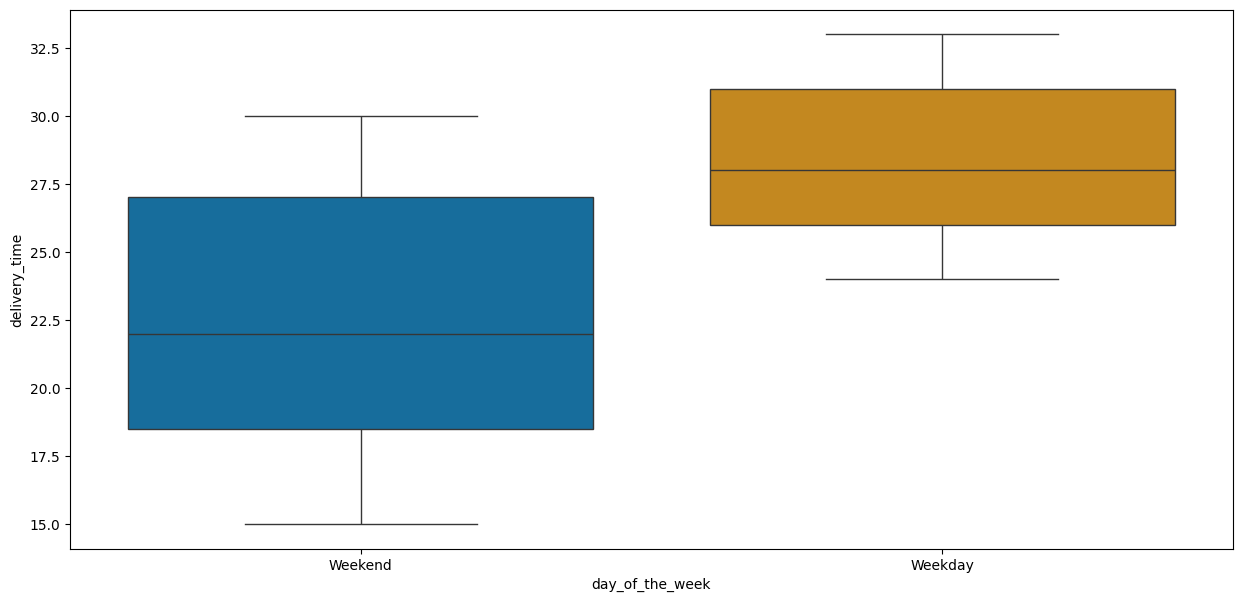

In [38]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = data, palette = 'colorblind')  ## Code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Observations:
1. Median delivery time during weekday is way higher than on the weekends.
2. Median delivery time on weekend is 22mins whereas during weekdays it is around 28mins.
3. Delivery time is slightly right skewd data and more orders takes longer than median delivery time.
4. During weekday, most of order took 24mins or higher time to deliver the order. Some order took up to 33mins on weekday.
5. Delivery time for some orders very low around 15mins on weekends.


#### Rating vs Delivery time

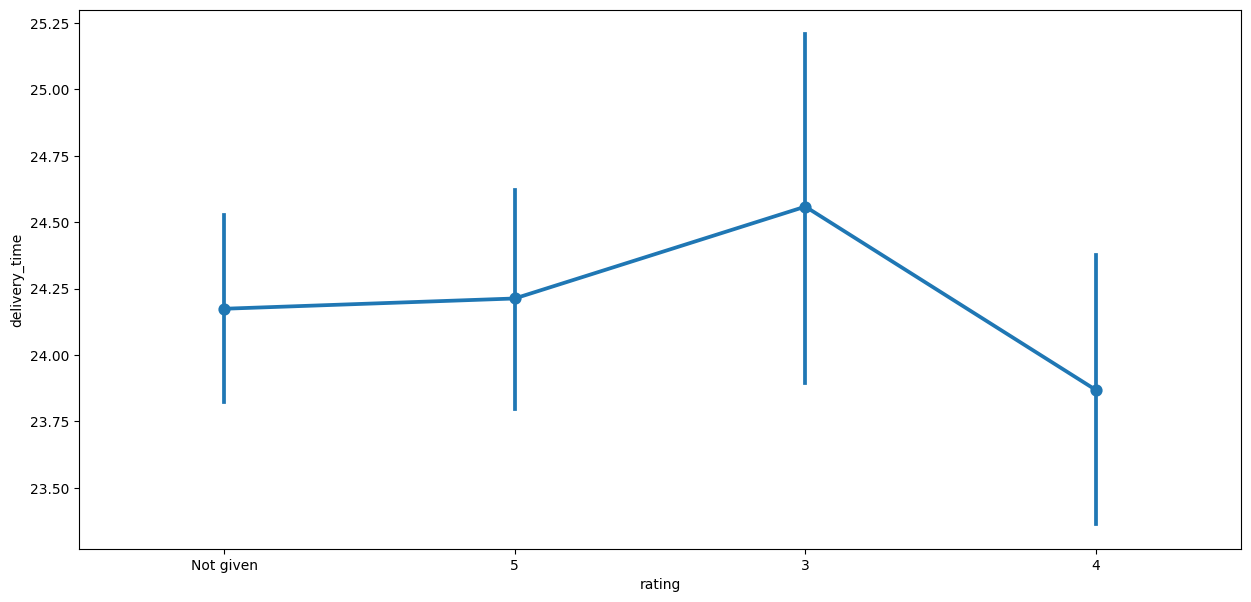

In [39]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = data)
plt.show()

#### Observations:
1. Average delivery time for order which got 3 rating is around 24.50mins.
2. Orders which got 3 rating took longer than other orders to deliver the food. 3. The graph do not strongly indicate that there is negative correlation between rating and delivery time if we looks delivery time for orders which got 4 rating. It needs further data analysis.
3. Average delivery time for order which got 4 rating is less 24mins.


#### Rating vs Food preparation time

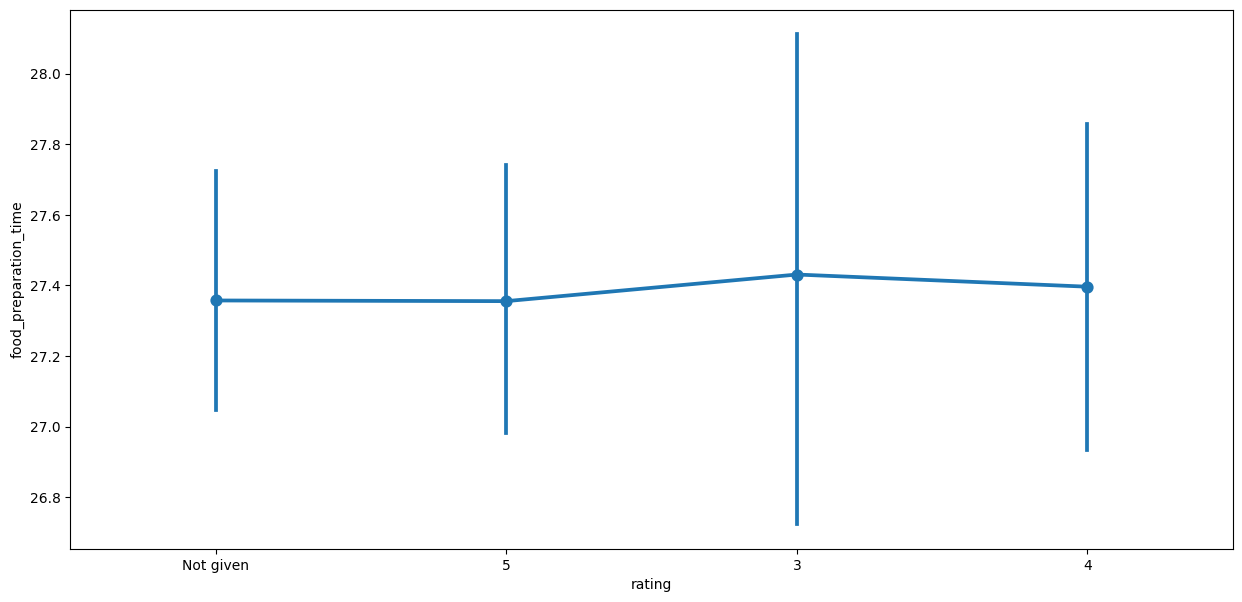

In [40]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = data)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Observations:
1. Central tendacy of food preparation time is around 27.4mins for all orders regardless rating on the order.  
2. Order which got 3 rating has wide range of food preparation time and varying from 26.7mins to 28.2mins.
3. Average time and central tendancy of food preparation time for orders which has 5 rating and orders which are not rated is almost same, and it is shorter compared to central tendacy of orders which has 3 rating.


#### Rating vs Cost of the order

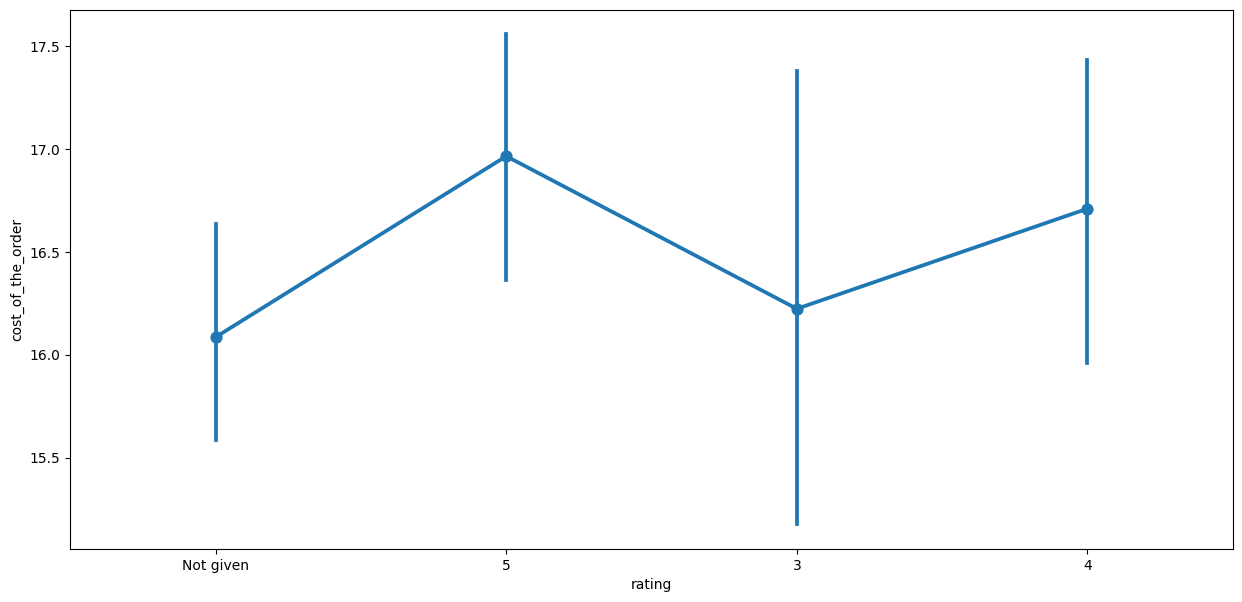

In [41]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = data)   ## Code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Observations:
1. Average cost of order for order which got 5 rating is around 16.8 dollars.
2. Orders which got 3 rating costed from 15 to 17.5 on average.
3. The graph slightly indicate there is positive correlation between rating and cost of order. It needs further data analysis.


#### Restaurant Name vs Cost of the order


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


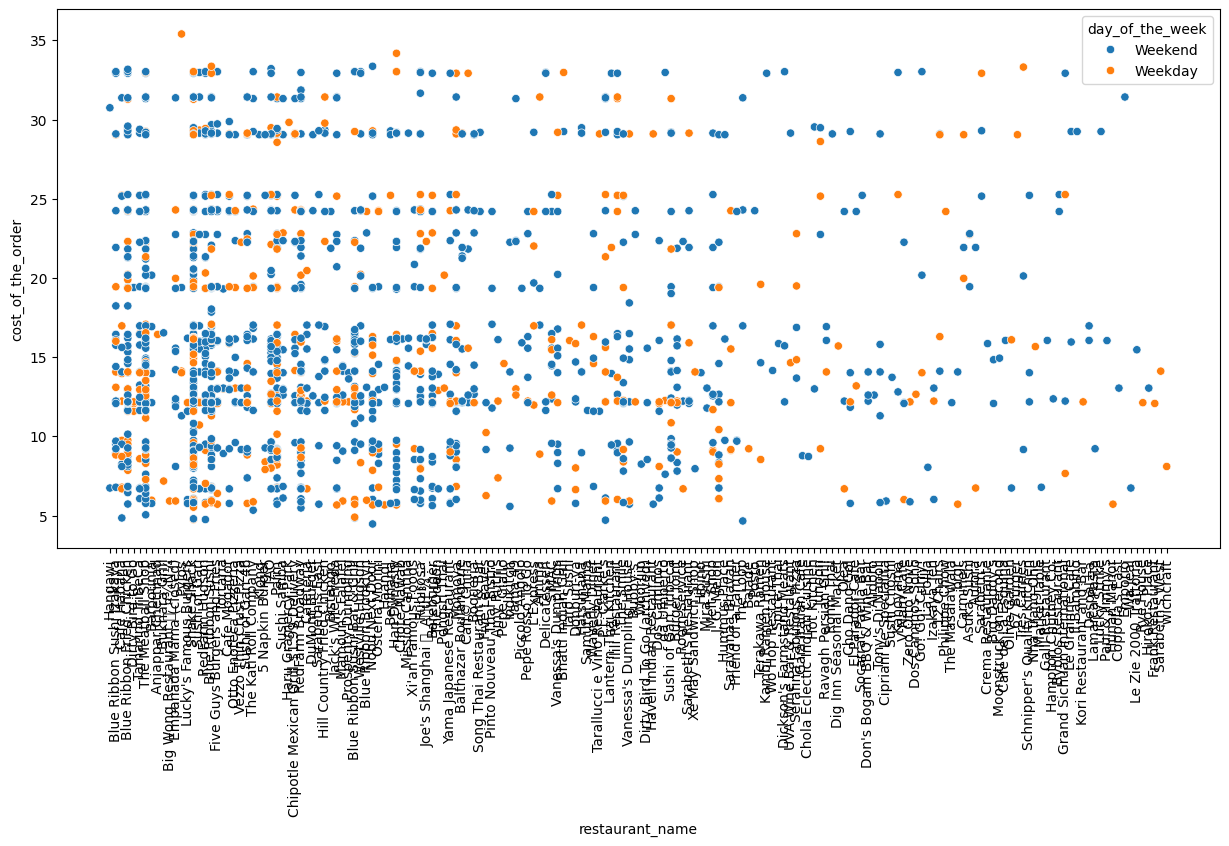

In [42]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data, x='restaurant_name', y ='cost_of_the_order', hue = 'day_of_the_week')
plt.xticks(rotation = 90)
plt.show()

### Observation
Graph is not helpful

In [43]:
# Top 10 expensive restaurants based on average cost of order per restaurant
data.groupby(['restaurant_name'])['cost_of_the_order'].mean().sort_values(ascending = False).head(10)

restaurant_name
Kambi Ramen House      32.930000
Emporio                31.430000
Bhatti Indian Grill    31.115000
Haru Gramercy Park     29.830000
Lucky Strike           29.250000
Il Bambino             29.250000
Sarabeth's             29.133333
Rohm Thai              29.100000
Klong                  29.050000
67 Burger              29.050000
Name: cost_of_the_order, dtype: float64

In [44]:
# Top 10 restaurants based on sum of all cost of the orders
data.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

#### Observations:
1. Kambi Ramen House restaurant has highest average cost of order (~33 dollars) in this FoodHub dataset.
2. Shake Shack is at top restaurant in terms of total sale generated from orders on FoodHub App.

#### Correlation among variables

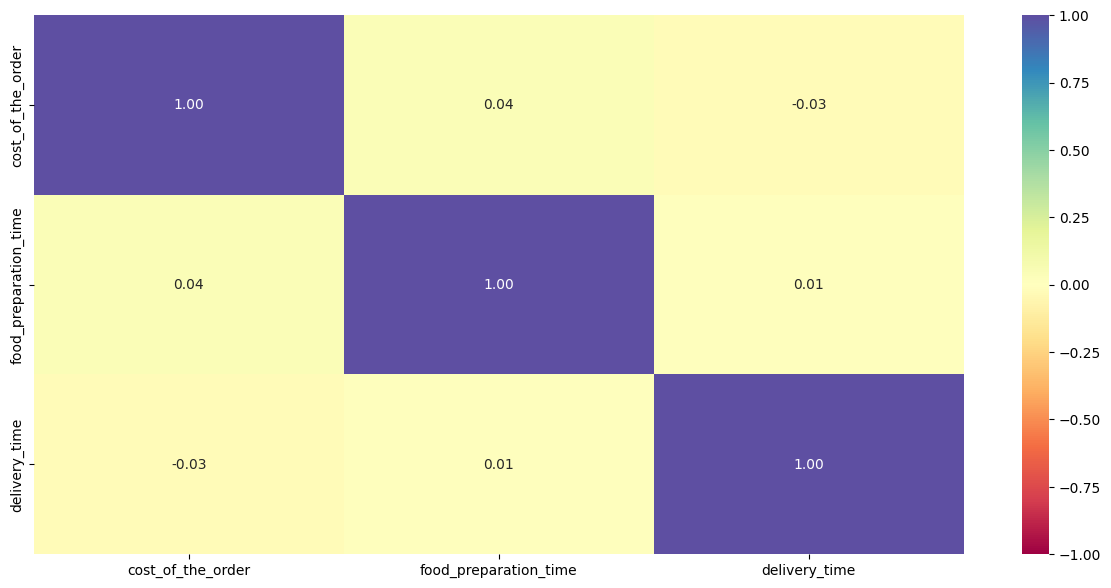

In [45]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(data[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
1. Heatmap indicate there is no strong relationship between cost of order and time required to deliver the order.
2. It would be nice to explore this heat map with orders which has rating.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [46]:
# Filter the rated restaurants
rated_data = data[data['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
rated_data['rating'] = rated_data['rating'].astype('int')
print(rated_data.shape);


(1162, 9)


In [47]:
# Create a dataframe that contains the restaurant names with their rating counts and avg rating for each restaurant
# Group by rated orders data by rating count and avg rating for each restaurant
restaurant_rating_count_avg = rated_data.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index();
restaurant_rating_count_avg.sort_values(by='count', ascending=False, inplace=True)
# Print the list
print(restaurant_rating_count_avg)

               restaurant_name  count      mean
117                Shake Shack    133  4.278195
132          The Meatball Shop     84  4.511905
17           Blue Ribbon Sushi     73  4.219178
16   Blue Ribbon Fried Chicken     64  4.328125
104           RedFarm Broadway     41  4.243902
..                         ...    ...       ...
51            Frank Restaurant      1  4.000000
118        Socarrat Paella Bar      1  5.000000
47             El Parador Cafe      1  5.000000
79                Lucky Strike      1  4.000000
0                   'wichcraft      1  5.000000

[156 rows x 3 columns]


In [48]:
# Filter restaurants which has rating count >=50 and avg rating 4 or higher
qualified_restaurants_names = restaurant_rating_count_avg[(restaurant_rating_count_avg['count'] >= 50) & (restaurant_rating_count_avg['mean'] >= 4)]
# Print the list of restaurants that matches the criteria
print(qualified_restaurants_names)

               restaurant_name  count      mean
117                Shake Shack    133  4.278195
132          The Meatball Shop     84  4.511905
17           Blue Ribbon Sushi     73  4.219178
16   Blue Ribbon Fried Chicken     64  4.328125


#### Observations:
Below are the 4 restaurant names which meets the criteria for promotional offer:
  1. Shake Shack
  2. The Meatball Shop
  3. Blue Ribbon Sushi
  4. Blue Ribbon Fried Chicken


### Let's redo heatmap with only rated data

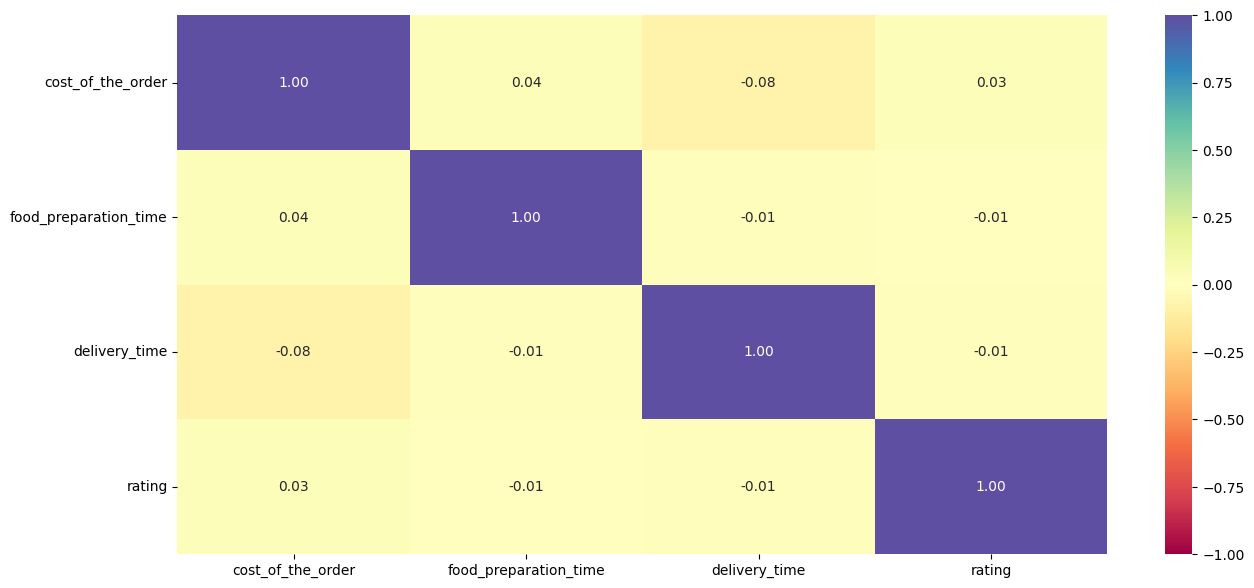

In [49]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
plt.figure(figsize=(15, 7))
sns.heatmap(rated_data[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observation
Heatmap indicate there is no strong correlation between rating and any other variable.

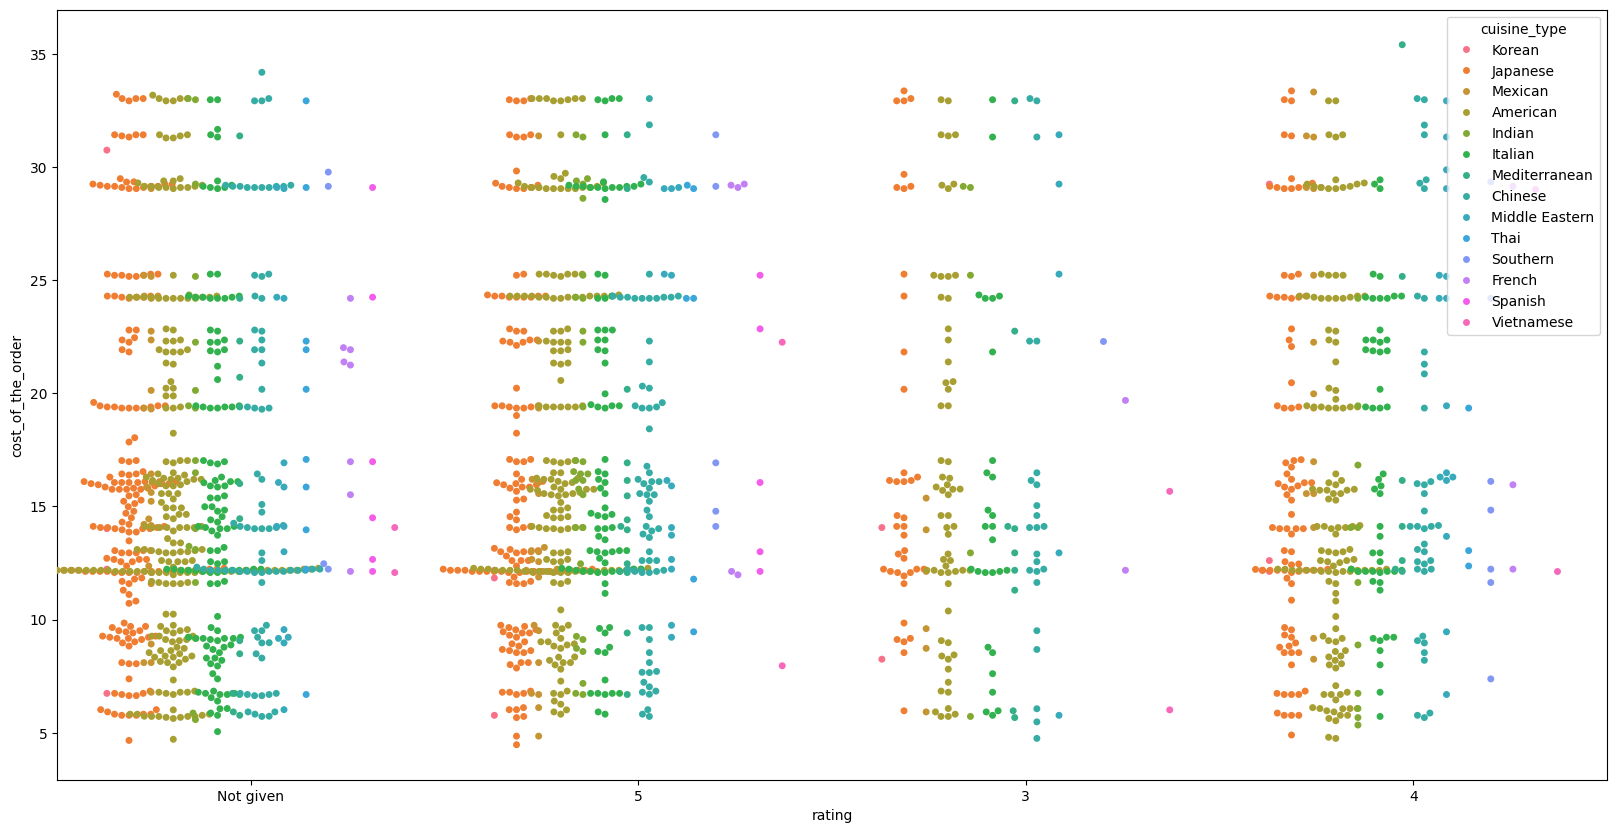

In [50]:
plt.figure(figsize=(20,10))
sns.swarmplot(data=df,x='rating',y='cost_of_the_order',hue='cuisine_type',size=5,dodge=True);

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [51]:
# First write a function to determine the FoodHub revenue
def compute_revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

data['FoodHub_Revenue'] = data['cost_of_the_order'].apply(compute_revenue) ## apply this function on cost of the order to calculater revenue generated for each order in dataset
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,FoodHub_Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [52]:
# Calculate the total revenue using FoodHub_Revenue column and print it
total_revenue_foodhub = data['FoodHub_Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue for FoodHub is around', round(total_revenue_foodhub, 2), 'dollars')

The net revenue for FoodHub is around 6166.3 dollars


#### Observations:
The net revenue for FoodHub is around 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [53]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
data['total_time'] = data['food_preparation_time'] + data['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
# Get orders that cost above 20 dollars
total_delivery_time_more_than_60 = data[data['total_time']>60] ## Write the appropriate column name to get the total delivery time took more than 60

# Calculate the number of total orders where the total delivery time is above 60 minutes
print('The number of total orders that took total delivery time is above 60 minutes:', total_delivery_time_more_than_60.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (total_delivery_time_more_than_60.shape[0] / data.shape[0]) * 100

print("Percentage of total orders with delivery time above 60 minutes:", round(percentage, 2), '%')



The number of total orders that took total delivery time is above 60 minutes: 200
Percentage of total orders with delivery time above 60 minutes: 10.54 %


In [54]:
# Get stats
data.describe().T
# data.describe(include='all').T  # To get all columns

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.250,1477495.500,1.477970e+06,1.478444e+06
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.750,128600.000,2.705250e+05,4.053340e+05
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.080,14.140,2.229750e+01,3.541000e+01
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.000,27.000,3.100000e+01,3.500000e+01
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.000,25.000,2.800000e+01,3.300000e+01
FoodHub_Revenue,1898.0,3.248842e+00,2.295598,0.00,1.812,2.121,5.574375e+00,8.852500e+00
total_time,1898.0,5.153372e+01,6.833603,35.00,47.000,52.000,5.600000e+01,6.800000e+01


#### Observations:
1. 10.54% of total orders took more than 60 minutes to deliver the food order.
2. Madian total time it took to deliver the food is 52mins and avg total time is 51.5mins, almost same!


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [55]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

## Get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


In [56]:
# Compare the total Revenue based on day of the week
data.groupby(['day_of_the_week'])['FoodHub_Revenue'].sum()
#print('The net revenue is around', round(total_revenue_foodhub, 2), 'dollars')
#print('-' * 50)

# Calculate the percentage of revenue over over weekdays vs. weekend
pd.DataFrame({'Day of the week ($)': data.groupby(['day_of_the_week'])['FoodHub_Revenue'].sum(),'Percentage of FoodHub Revenue':(data.groupby(['day_of_the_week'])['FoodHub_Revenue'].sum()/total_revenue_foodhub)*100})

,Day of the week ($),Percentage of FoodHub Revenue
day_of_the_week,,
Weekday,1754.3345,28.450345
Weekend,4411.9685,71.549655


#### Observations:
1. The mean delivery time on weekdays is around 28 minutes whereas the mean delivery time on weekends is around 22 minutes.
2. FoodHub's 71.5% of total revenue came from orders received on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [57]:
# Get top 5 restaurants with highest number of orders
data['cuisine_type'].value_counts().head()

American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64

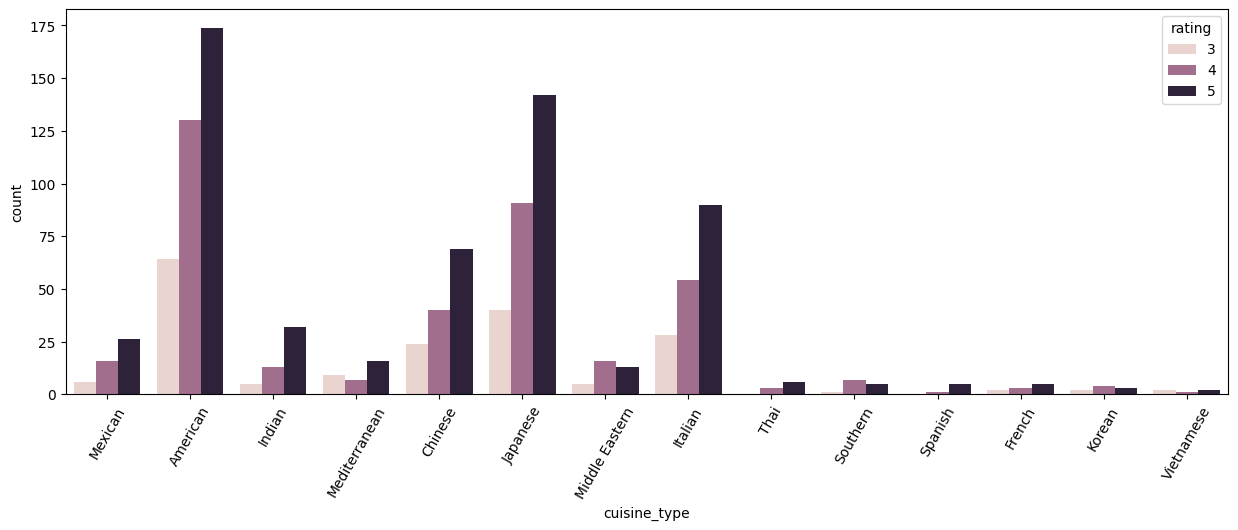

In [58]:
# Number of orders by Cuisine type in Rated Orders
plt.figure(figsize = (15,5))
sns.countplot(rated_data, x = 'cuisine_type', hue='rating'); ## Countplot of rated orders by cuisine type.
plt.xticks(rotation=60);

In [59]:
# Create a dataframe that contains the restaurant names with their rating counts and avg rating for each restaurant

# Group by rated orders data by rating count and avg rating for each restaurant
cuisine_rating_count_avg = rated_data.groupby('cuisine_type')['rating'].agg(['count', 'mean']).reset_index();
cuisine_rating_count_avg.sort_values(by='mean', ascending=False, inplace=True)

print(cuisine_rating_count_avg)


      cuisine_type  count      mean
11         Spanish      6  4.833333
12            Thai      9  4.666667
3           Indian     50  4.540000
8          Mexican     48  4.416667
5         Japanese    273  4.373626
4          Italian    172  4.360465
1          Chinese    133  4.338346
10        Southern     13  4.307692
2           French     10  4.300000
0         American    368  4.298913
9   Middle Eastern     34  4.235294
7    Mediterranean     32  4.218750
6           Korean      9  4.111111
13      Vietnamese      5  4.000000


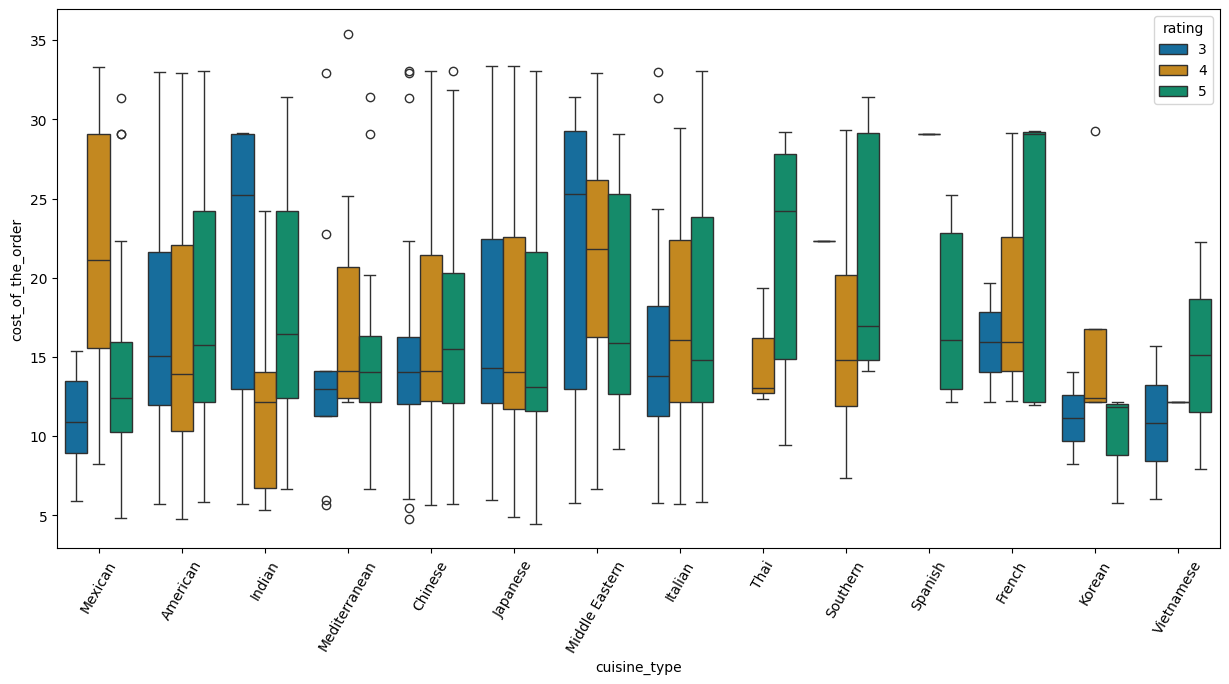

In [60]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", hue='rating', data = rated_data, palette = 'colorblind');
plt.xticks(rotation = 60)
plt.show()

**Let's look in to cuisine types which got 3 rating**

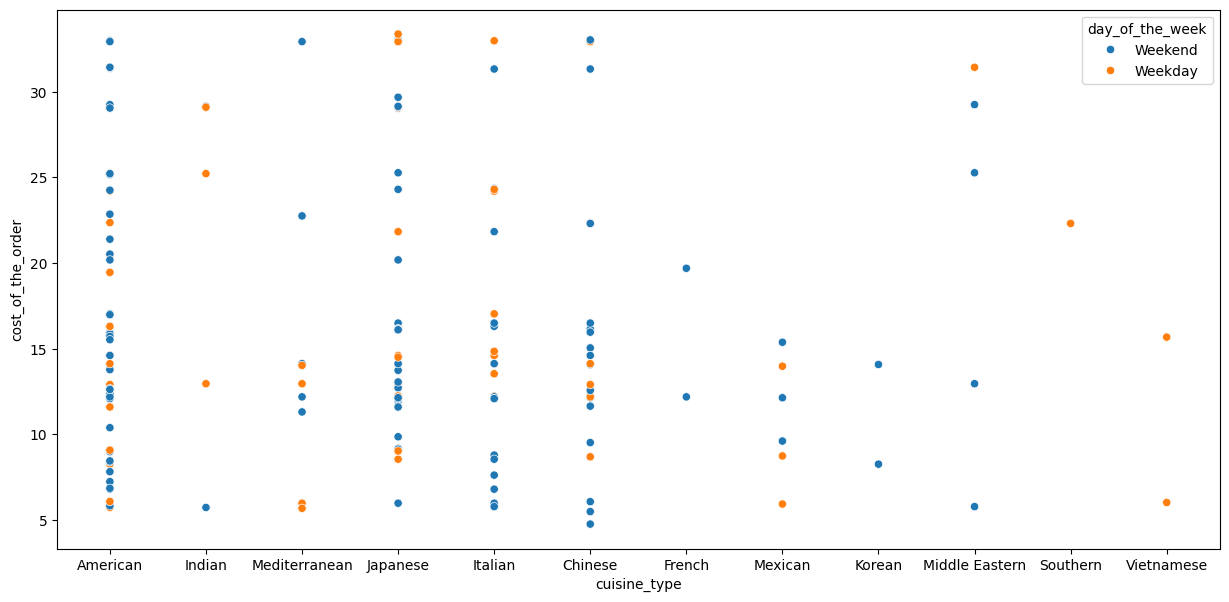

In [61]:
# Filter restaurants which has rating count == 3
low_rated_orders = rated_data[rated_data['rating'] ==3]
plt.figure(figsize=(15,7))
sns.scatterplot(data=low_rated_orders, x='cuisine_type', y ='cost_of_the_order', hue='day_of_the_week')
plt.show()

**Let's look in to restaurants which got 3 rating and cost of order is >= 10 dollars**



In [62]:
low_rated_orders_restaurants_10 = rated_data[(rated_data['cost_of_the_order']>=10) & (rated_data['rating']==3)].sort_values(by='cost_of_the_order', ascending=False);
restaurant_counts = low_rated_orders_restaurants_10.groupby('restaurant_name').size().reset_index(name='count');
restaurant_counts.sort_values(by='count', ascending=False, inplace=True);
#print(restaurant_counts)
print(restaurant_counts.shape);

(57, 2)


### Observation
Only 57 orders which cost of order is higher than 10 dollars got 3 rating.

In [63]:
# Create a dataset of total cost paid by customer and average cost of order per restaurant
# Calculate the total cost paid by customer and average cost of order for each restaurant
total_cost_and_avg_cost = data.groupby('restaurant_name')['cost_of_the_order'].agg(['sum', 'mean']).reset_index();

# Rename the columns for clarity
total_cost_and_avg_cost.columns = ['Restaurant', 'Total Cost', 'Avg Cost of Order']

# Sort the DataFrame by total_cost in descending order and select the top 10 total cost paid by customer
top_10_restaurants = total_cost_and_avg_cost.sort_values(by='Total Cost', ascending=False).head(10)

# Display the top 10 restaurants with total cost and avg cost of order
print(top_10_restaurants)


                        Restaurant  Total Cost  Avg Cost of Order
136                    Shake Shack     3579.53          16.344886
153              The Meatball Shop     2145.21          16.251591
21               Blue Ribbon Sushi     1903.95          15.999580
20       Blue Ribbon Fried Chicken     1662.29          17.315521
109                           Parm     1112.76          16.364118
121               RedFarm Broadway      965.13          16.358136
122                 RedFarm Hudson      921.21          16.749273
145                            TAO      834.50          17.030612
66                     Han Dynasty      755.29          16.419348
22   Blue Ribbon Sushi Bar & Grill      666.62          15.150455


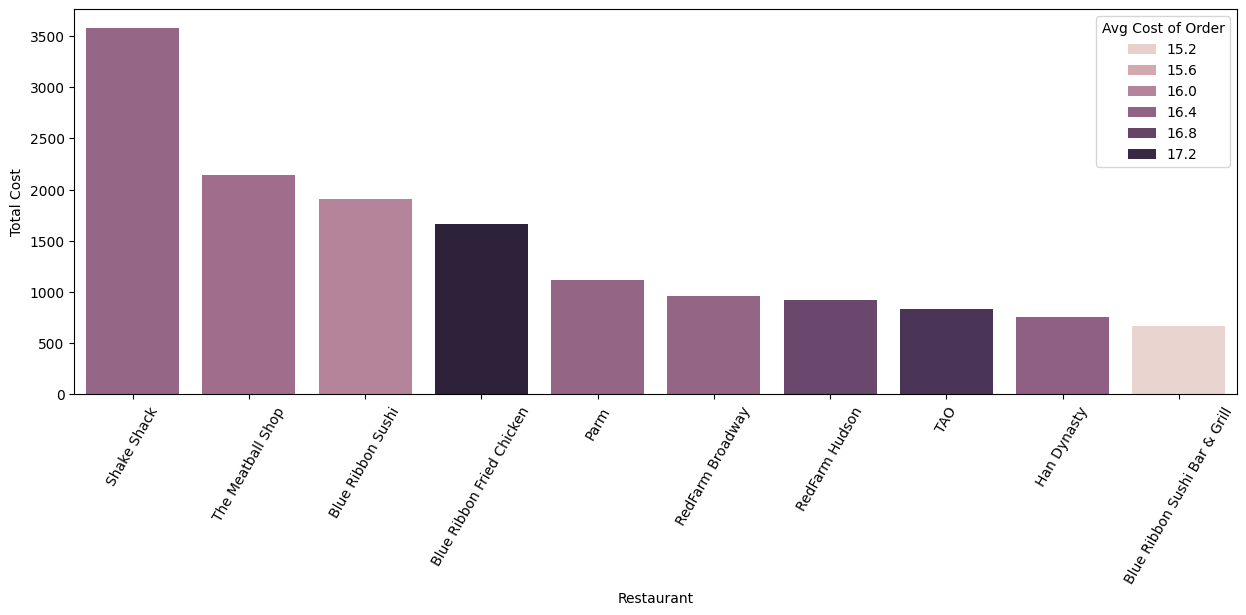

In [64]:
plt.figure(figsize = (15,5))
sns.barplot(data=top_10_restaurants, y ='Total Cost', x ='Restaurant',hue = 'Avg Cost of Order')
plt.xticks(rotation=60);

### Conclusions:
1. Spanish and Thai restaurants have excellent ratings of 4.83 and 4.66 on average respectively. FoodHub can advertise and promote these highly rated restaurants on customer's login to the FoodHub App.
2. Median cost of order for Spanish and Thai order seems higher than other cuisine. FoodHub can jointly run some promotional offers with these restaurants to give customers some discounts to increase sales. Run promotions like a 10% discount on orders above 25 dollars on Thai and Spanish cultural. holidays.
3. Kambi Ramen House restaurant has the highest average cost of order (~33 dollars) in this FoodHub dataset. FoodHub should speak with this restaurant and make them aware and see if they bring down the average cost of orders with some discount for orders over 30 dollars.
4. Shake Shack is at the top restaurant in terms of total sales generated from orders on the FoodHub App. Thank the restaurant and run some promotions for this restaurant because it seems this is one of the popular restaurants.
5. Average cost of order for top 10 restaurants based on total revenue is around 15 to 17 dollars.  
6. Although American, Japanese, Italian, and Chinese cuisines are the most popular on FoodHub, a # of 3 rating is also significant in these types of cuisine. Further analysis by the business if the rating can be improved.

---

### **Actionable Insights and Recommendations**

#### **Insights**

We analyzed nearly 1900 food orders placed through the FoodHub app in the New York area. FoodHub provider food delivery service from variety of restaurants like American, Japanese, Italian and 11 other type of cuisines. The dataset contains the food delivered over the weekdays as well as on weekends.
The main feature interest here is different restaurants and ratings for their food orders placed via the FoodHub App.

Both from restaurants and FoodHub business perspective, a long waiting time, since the time order is placed until it is delivered, is critical factor for customer’s satisfaction and it can be significantly improved. Though there could be many reasons impacting total delivery time, a very less number of food orders are placed during weekdays compared to weekends. Also, approx. 40% of customers didn’t provide rating which is not good and so FoodHub needs to improve in customer feedback mechanism so that more customers provides feedback.


We have been able to conclude that -  

1. FoodHub is a popular food delivery service in the New York area.
2. 14 types of cuisine food available and 178 restaurants sold food via FoodHub.
3. FoodHub delivers food mostly within an hour after order is confirmed by restaurant.
4. Most customer has a rating 4 or higher on food orders delivered by FoodHub.
5. FoodHub get a lot of more food orders on the weekends compared to on weekdays.
6. American and Japanese are most popular in food orders placed visa FoodHub.
7. The average cost of food orders on FoobHub is less than 15 dollars.
8. We need to investigate why food orders received during weekdays is very less.
9. Although American, Japanese, Italian and Chinese cuisines are the most popular on FoodHub, number of 3 rating orders is also significant in these types of cuisine.


#### **Recommendations to business**

1. American, Japanese, Italian and Chinese cuisine food orders are very popular on FoobHub, however Mexican, Indian and Middle Eastern food show potential to grow business.
2. 75% of overall orders received are on weekends. FoodHub needs to maintain good customer service to keep up with demands on weekends. Performance of App needs to ensured to be at best on weekends to provide smooth experience to customer to place the order.
3. 25% of overall orders received are on the weekdays which shows great potential to increase sale during weekdays like providing promotions to customers during weekdays or providing promotions to restaurants and a delivery person so that our food orders are prioritized to reduce total delivery time.
4. 40% of orders don’t have a rating and we need to investigate why customers didn’t provide feedback. Recommend sending followed up reminders to customer to give feedback. Incentives to give feedback like a chance to win a prize from a lottery of feedback survey. Also, it will very valuable to enhance rating feedback form to get more data on a)Quality of food b) Delivery service c) Feedback improvement in customer service d) Food packaging etc.
5. 10% of orders took over 60 mins and we need looks in to such type of orders and address challenge/s to deliver within 60mins.
6. We need data on the date and time when an order is placed so we can investigate what days during weekdays or weekends we see more or less orders through our App.
7. We need data on the delivery address which will be helpful to understand the distance from restaurants, and the overall where more or fewer demands of food delivery services in New York area.
8. Spanish and Thai restaurants received the highest on avg rating however their median cost of order is higher than other cuisines. FoodHub can jointly run some promotional offers with such restauarants to give customers some discount to increase sales. For example, run promotions of 10% discount on orders above 25 dollars on Thai and Spanish cultural holidays.
9. FoodHub can advertise and promote these highly rated cuisines as well as most popular restaurants like Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken on FoodHub App.


####  **Further Analysis that can be done**

1. We do not have data on the date and time of orders. We should explore more on food order types and their rating during weekdays vs. weekends.
2. Delivery address can significantly help us further analyze data to check high or less demands based on local and restaurants available in that neighborhood.
3. Gathering more detailed data on the date and time when the food order was placed until the food was delivered will help understand the factors impacting higher delivery time during weekdays. We will be able analyze whether traffic is adding more or availability of delivery person or restaurants are taking longer time preparare food etc.
4. Average time for food preparation is approx. 27 mins. Some food orders took only 20 minutes whereas some food orders took almost 35 minutes for preparation. Though food might have been ready sooner but the exact data is not provided on how long the food package was on stand by until delivery person confirmed the pick up food.
5. Average cost of food order on FoobHub is less 15 dollars. We can analyze further how to give promotions like 10% discount on future food orders e.g. order over $25 for repeat customers and/or most popular restaurants which are top contributors FoodHub revenue.

Thank you very much for your time!

In [65]:
# To convert notebook in to html file run following code. It will save html file in same location as notebook
!jupyter nbconvert --to html '/content/drive/MyDrive/GreatLearning/RahulGanbote_FoodHub_EDA_FullCode.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/GreatLearning/RahulGanbote_FoodHub_EDA_FullCode.ipynb to html
[NbConvertApp] Writing 2536479 bytes to /content/drive/MyDrive/GreatLearning/RahulGanbote_FoodHub_EDA_FullCode.html
